In [102]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.svm import SVC

# Additional imports
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score , confusion_matrix , classification_report
from sklearn.model_selection import GridSearchCV, cross_validate
import openpyxl
import warnings
warnings.simplefilter(action='ignore')

<a id="Data_Overview"></a>
<h1 style='background:#F5F5DC;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center>Data Overview</center></h1>

In [104]:
# Step 1: Data Loading and Understanding

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ecommerce_data.csv')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [105]:
df.shape

(5630, 20)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [107]:
df.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
PreferredLoginDevice,3
CityTier,3
WarehouseToHome,34
PreferredPaymentMode,7
Gender,2
HourSpendOnApp,6
NumberOfDeviceRegistered,6


In [108]:
# colums to list
columns = df.columns.to_list()
columns

['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [109]:
df.select_dtypes(exclude=np.number).columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [110]:
df.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )


,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630
unique,3,7,2,6,3
top,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
freq,2765,2314,3384,2050,2986


In [111]:
# Show the unique values on each column.
for col in df.columns:
    if df[col].dtype == object:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

PreferredLoginDevice : ['Mobile Phone' 'Phone' 'Computer']
PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: count, dtype: int64
________________________________________________________________________________
PreferredPaymentMode : ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
PreferredPaymentMode
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: count, dtype: int64
________________________________________________________________________________
Gender : ['Female' 'Male']
Gender
Male      3384
Female    2246
Name: count, dtype: int64
________________________________________________________________________________
PreferedOrderCat : ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
PreferedOrderCat
Laptop & Accessory    2050
Mobile Phone          1271
Fashion    

In [112]:

df.select_dtypes(include=np.number).columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [113]:
df.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Churn,5630.000000,0.168384,0.374240,0.000000,0.000000,0.000000,0.000000,1.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
CityTier,5630.000000,1.654707,0.915389,1.000000,1.000000,1.000000,3.000000,3.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
NumberOfDeviceRegistered,5630.000000,3.688988,1.023999,1.000000,3.000000,4.000000,4.000000,6.000000
SatisfactionScore,5630.000000,3.066785,1.380194,1.000000,2.000000,3.000000,4.000000,5.000000
NumberOfAddress,5630.000000,4.214032,2.583586,1.000000,2.000000,3.000000,6.000000,22.000000
Complain,5630.000000,0.284902,0.451408,0.000000,0.000000,0.000000,1.000000,1.000000


In [114]:
for col in df.columns:
    if df[col].dtype == float or df[col].dtype == int:
        print(str(col) + ' : ' + str(df[col].unique()))
        print(df[col].value_counts())
        print("________________________________________________________________________________")

CustomerID : [50001 50002 50003 ... 55628 55629 55630]
CustomerID
55630    1
50001    1
50002    1
50003    1
50004    1
        ..
50034    1
50035    1
50036    1
50037    1
50038    1
Name: count, Length: 5630, dtype: int64
________________________________________________________________________________
Churn : [1 0]
Churn
0    4682
1     948
Name: count, dtype: int64
________________________________________________________________________________
Tenure : [ 4. nan  0. 13. 11.  9. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.
  6. 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51.
 61.]
Tenure
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0 

In [115]:
#As mobile phone and phone are both same so we have merged them
df.loc[df['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'
df.loc[df['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [116]:
df['PreferredLoginDevice'].value_counts()

,count
PreferredLoginDevice,
Mobile Phone,3996
Computer,1634


In [117]:
#as cod is also cash on delievery
#as cc is also credit card so i merged them
df.loc[df['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'   # uses loc function
df.loc[df['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [118]:
df['PreferredPaymentMode'].value_counts()

,count
PreferredPaymentMode,
Debit Card,2314
Credit Card,1774
E wallet,614
Cash on Delivery,514
UPI,414


In [119]:
# convert num_cols to categories
df2 = df.copy()
for col in df2.columns:
  if col == 'CustomerID':
    continue

  else:
    if df2[col].dtype == 'int':
      df2[col] = df[col].astype(str)

df2.dtypes

,0
CustomerID,int64
Churn,object
Tenure,float64
PreferredLoginDevice,object
CityTier,object
WarehouseToHome,float64
PreferredPaymentMode,object
Gender,object
HourSpendOnApp,float64
NumberOfDeviceRegistered,object


In [120]:
# Categorical cols after Converting
df2.describe(include='O').style.background_gradient(axis=None , cmap = "Blues" , vmin = 0 , vmax = 9000  )

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain
count,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630,5630
unique,2,2,3,5,2,6,5,5,3,15,2
top,0,Mobile Phone,1,Debit Card,Male,4,Mobile Phone,3,Married,2,0
freq,4682,3996,3666,2314,3384,2377,2080,1698,2986,1369,4026


In [121]:
# Numerical cols after Converting
df2.describe().T.style.bar(subset=['mean']).background_gradient(subset=['std','50%','max'])

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.000000,52815.500000,1625.385339,50001.000000,51408.250000,52815.500000,54222.750000,55630.000000
Tenure,5366.000000,10.189899,8.557241,0.000000,2.000000,9.000000,16.000000,61.000000
WarehouseToHome,5379.000000,15.639896,8.531475,5.000000,9.000000,14.000000,20.000000,127.000000
HourSpendOnApp,5375.000000,2.931535,0.721926,0.000000,2.000000,3.000000,3.000000,5.000000
OrderAmountHikeFromlastYear,5365.000000,15.707922,3.675485,11.000000,13.000000,15.000000,18.000000,26.000000
CouponUsed,5374.000000,1.751023,1.894621,0.000000,1.000000,1.000000,2.000000,16.000000
OrderCount,5372.000000,3.008004,2.939680,1.000000,1.000000,2.000000,3.000000,16.000000
DaySinceLastOrder,5323.000000,4.543491,3.654433,0.000000,2.000000,3.000000,7.000000,46.000000
CashbackAmount,5630.000000,177.223030,49.207036,0.000000,145.770000,163.280000,196.392500,324.990000


In [122]:
df.duplicated().sum()

0

In [123]:
# the sum of null values
grouped_data = []
for col in columns:
    n_missing = df[col].isnull().sum()
    percentage = n_missing / df.shape[0] * 100
    grouped_data.append([col, n_missing, percentage])

# Create a new DataFrame from the grouped data
grouped_df = pd.DataFrame(grouped_data, columns=['column', 'n_missing', 'percentage'])

# Group by 'col', 'n_missing', and 'percentage'
result = grouped_df.groupby(['column', 'n_missing', 'percentage']).size()
result

,,,0
column,n_missing,percentage,
CashbackAmount,0,0.000000,1
Churn,0,0.000000,1
CityTier,0,0.000000,1
Complain,0,0.000000,1
CouponUsed,256,4.547069,1
CustomerID,0,0.000000,1
DaySinceLastOrder,307,5.452931,1
Gender,0,0.000000,1
HourSpendOnApp,255,4.529307,1


In [125]:
round((df.isnull().sum()*100 / df.shape[0]),2)

,0
CustomerID,0.00
Churn,0.00
Tenure,4.69
PreferredLoginDevice,0.00
CityTier,0.00
WarehouseToHome,4.46
PreferredPaymentMode,0.00
Gender,0.00
HourSpendOnApp,4.53
NumberOfDeviceRegistered,0.00


<Axes: >

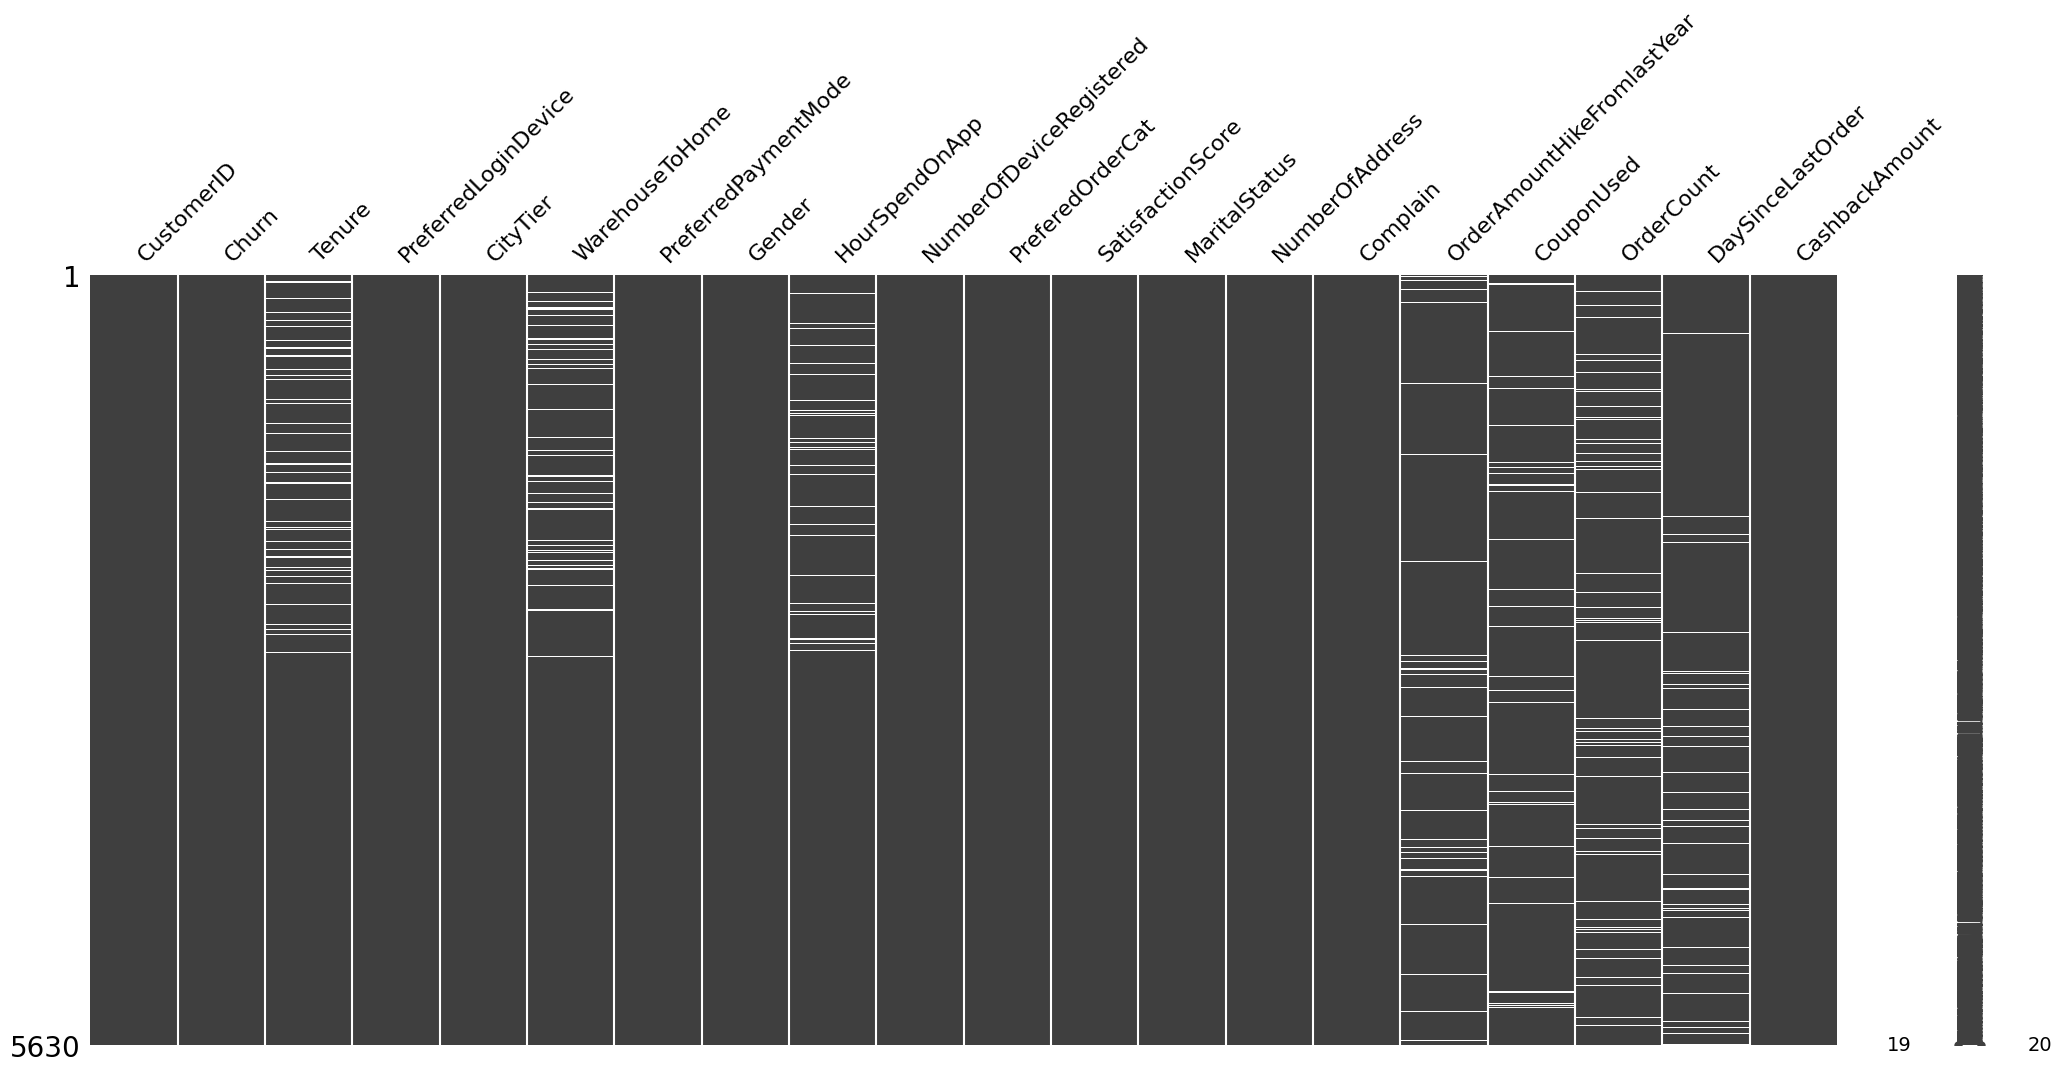

In [126]:
msno.matrix(df)

<Axes: >

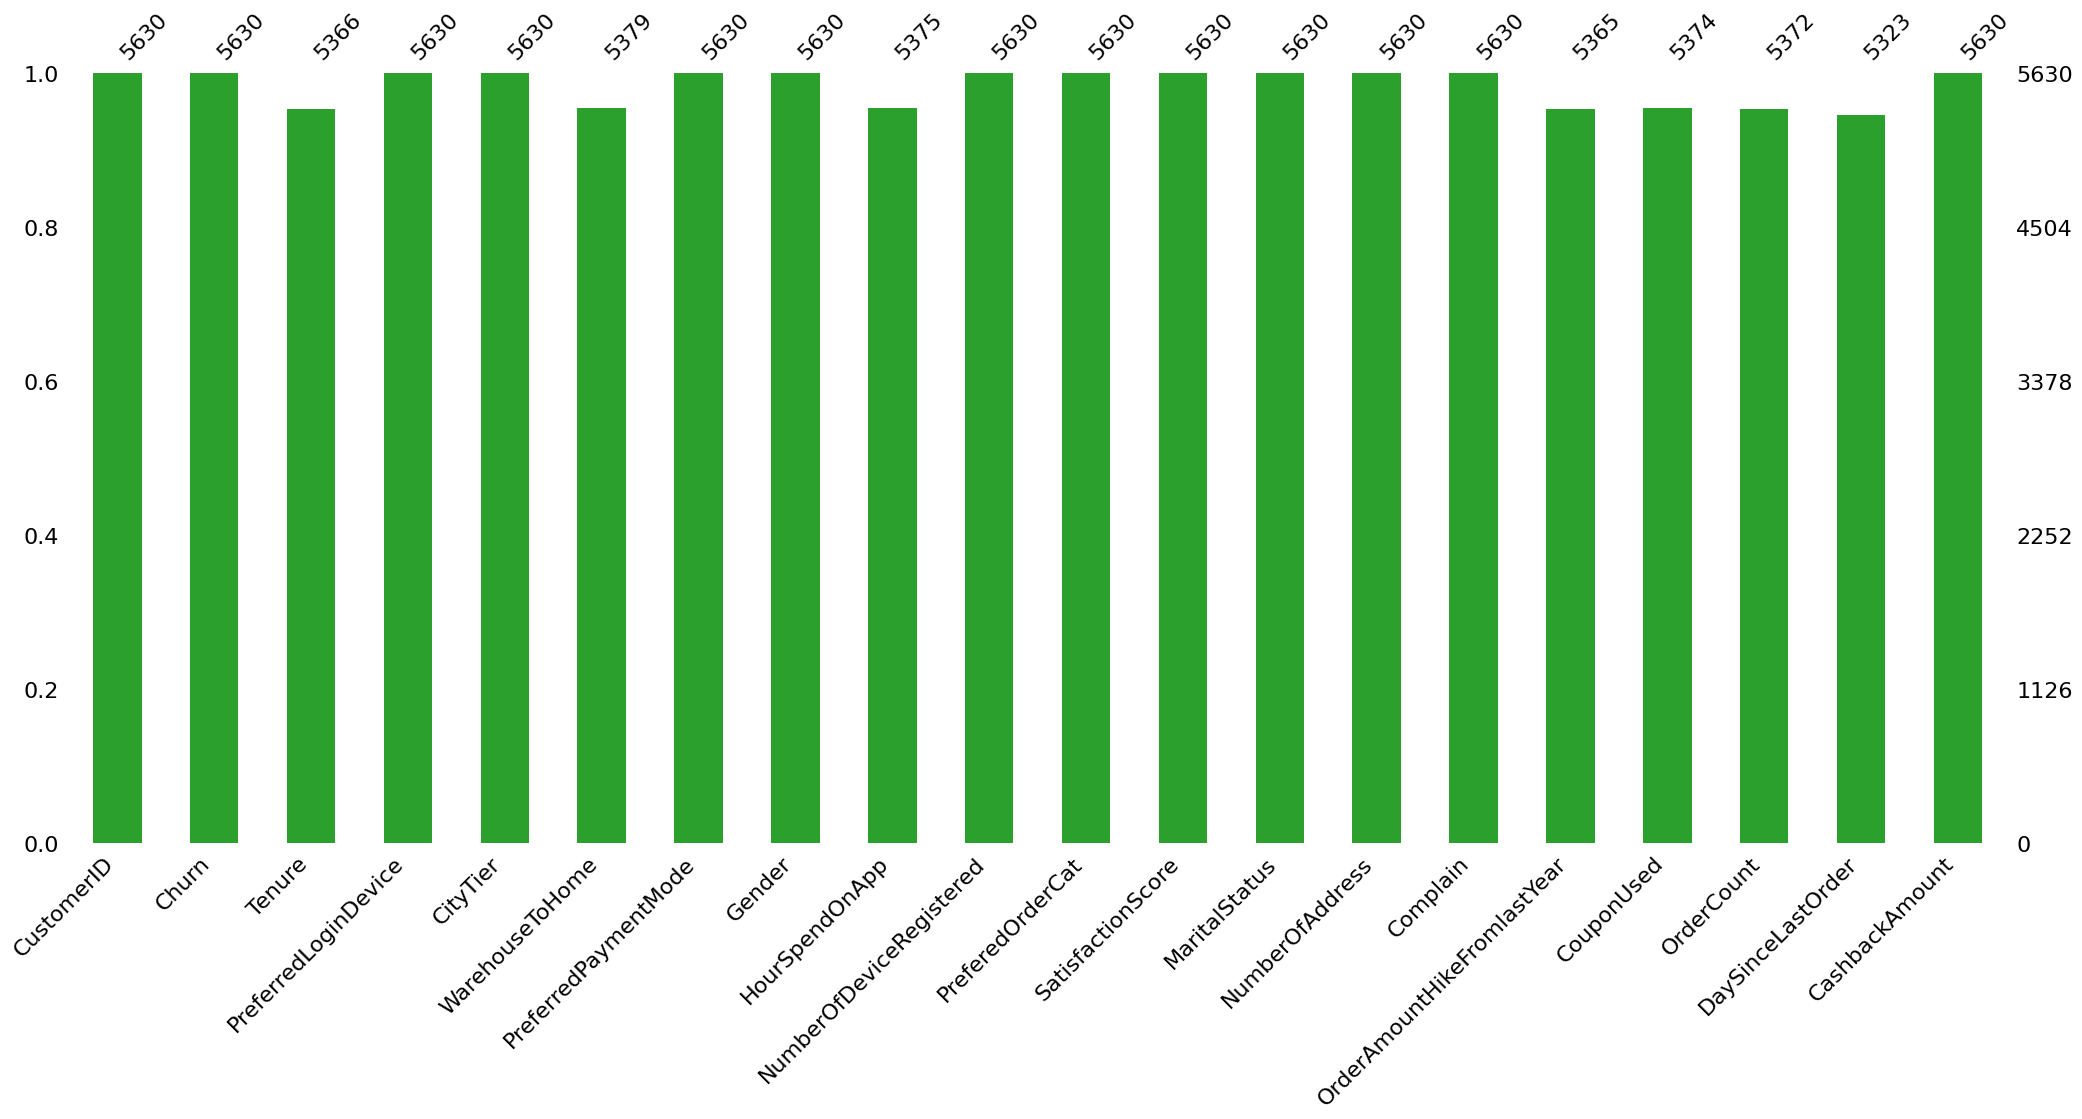

In [127]:
msno.bar(df , color="tab:green")

#### All Missing values less than 6% so we can impute them

<Axes: xlabel='Tenure', ylabel='Density'>

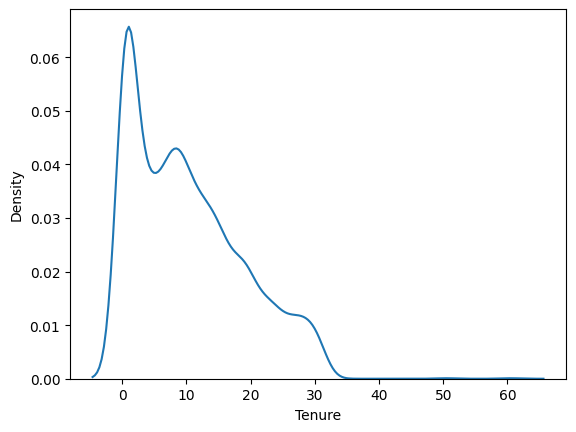

In [128]:
sns.kdeplot(df , x='Tenure')

In [129]:
# impute with bfill Method
df['Tenure'] = df['Tenure'].fillna(method = 'bfill')

<Axes: xlabel='Tenure', ylabel='Density'>

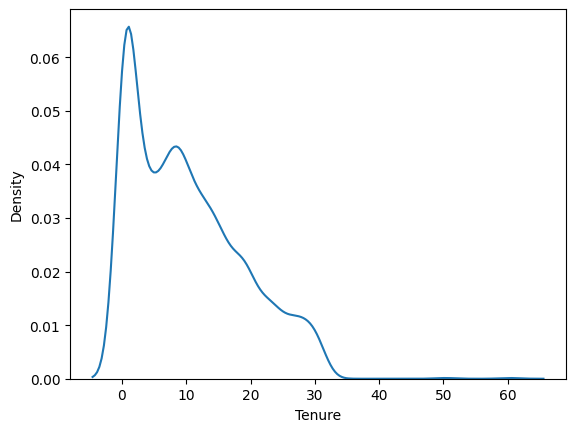

In [130]:
sns.kdeplot(df , x='Tenure')

In [131]:
df['Tenure'].isnull().sum()

0

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

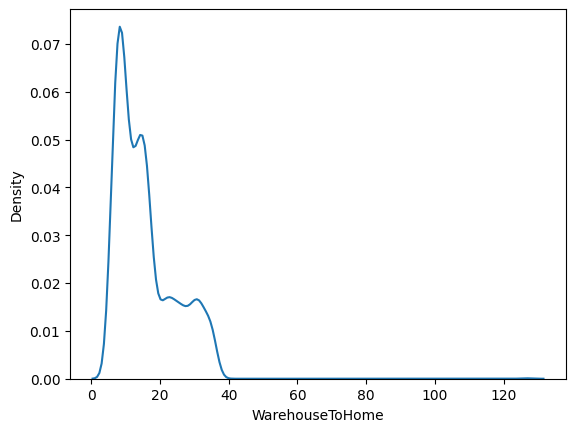

In [132]:
sns.kdeplot(df , x='WarehouseToHome')

In [133]:
# Impute with simple imputer
from sklearn.impute import SimpleImputer
s_imp = SimpleImputer(missing_values=np.nan , strategy = 'most_frequent')
df['WarehouseToHome'] = s_imp.fit_transform(pd.DataFrame(df['WarehouseToHome']))

<Axes: xlabel='WarehouseToHome', ylabel='Density'>

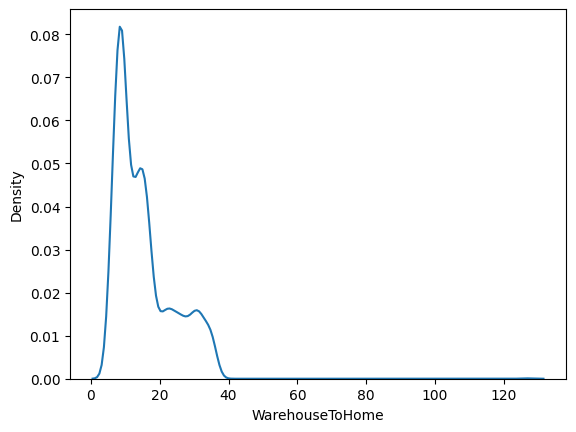

In [134]:
sns.kdeplot(df , x='WarehouseToHome')

In [135]:
df['WarehouseToHome'].isnull().sum()

0

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

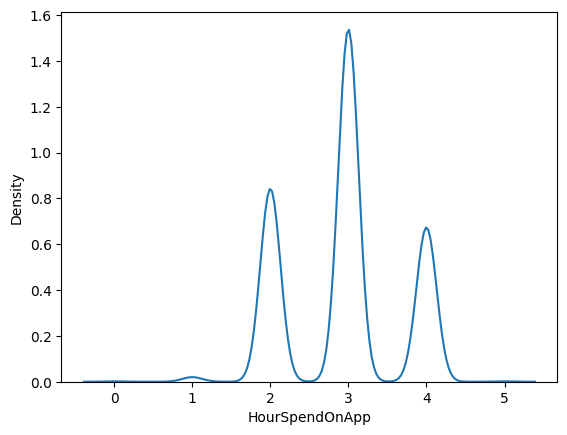

In [136]:
sns.kdeplot(df , x='HourSpendOnApp')

In [137]:
fill_list = df['HourSpendOnApp'].dropna()
df['HourSpendOnApp'] = df['HourSpendOnApp'].fillna(pd.Series(np.random.choice(fill_list , size = len(df['HourSpendOnApp'].index))))

<Axes: xlabel='HourSpendOnApp', ylabel='Density'>

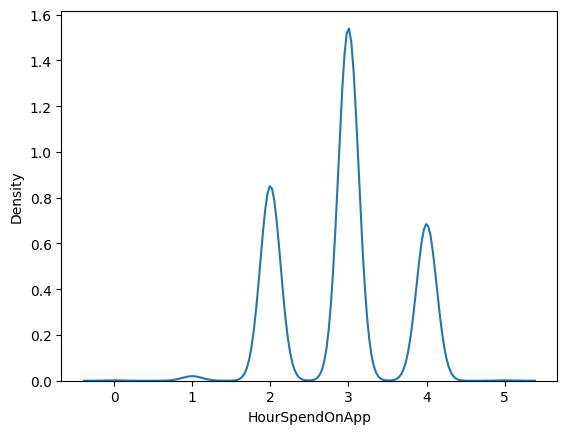

In [138]:
sns.kdeplot(df , x='HourSpendOnApp')

In [139]:
df['HourSpendOnApp'].isnull().sum()

0

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

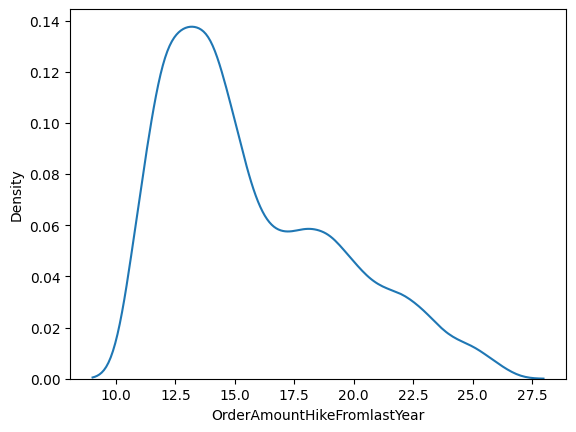

In [140]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [141]:
# impute with ffill method
df['OrderAmountHikeFromlastYear'] = df['OrderAmountHikeFromlastYear'].fillna(method = 'ffill')

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='Density'>

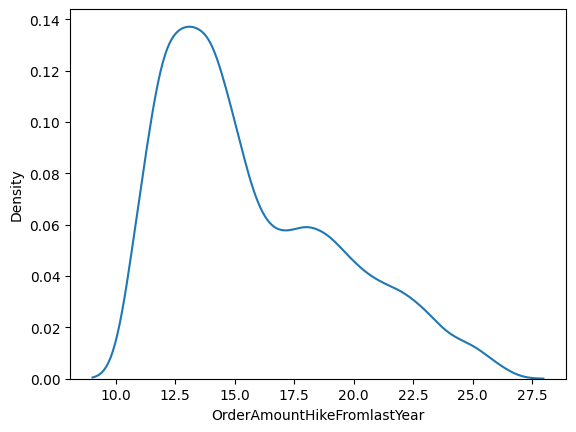

In [142]:
sns.kdeplot(df , x='OrderAmountHikeFromlastYear')

In [143]:
df['OrderAmountHikeFromlastYear'].isnull().sum()

0

<Axes: xlabel='CouponUsed', ylabel='Density'>

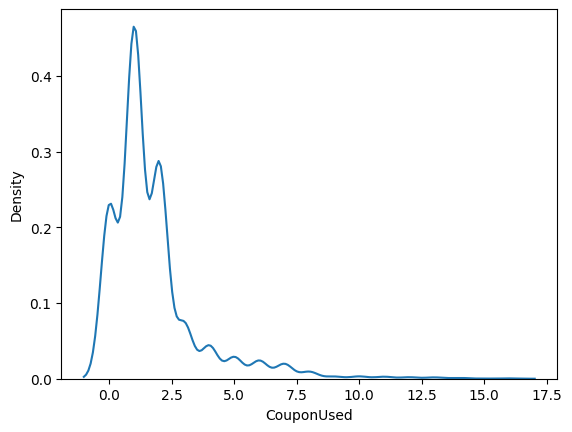

In [144]:
sns.kdeplot(df , x='CouponUsed')

In [145]:
# Impute with KNN Imputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['CouponUsed']=imputer.fit_transform(df[['CouponUsed']])

<Axes: xlabel='CouponUsed', ylabel='Density'>

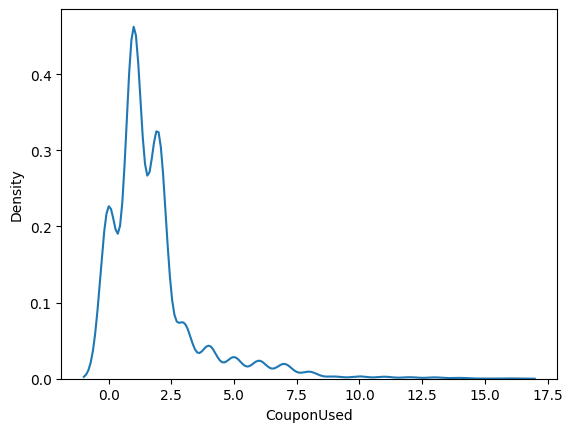

In [146]:
sns.kdeplot(df , x='CouponUsed')

In [147]:
df['CouponUsed'].isnull().sum()

0

<Axes: xlabel='OrderCount', ylabel='Density'>

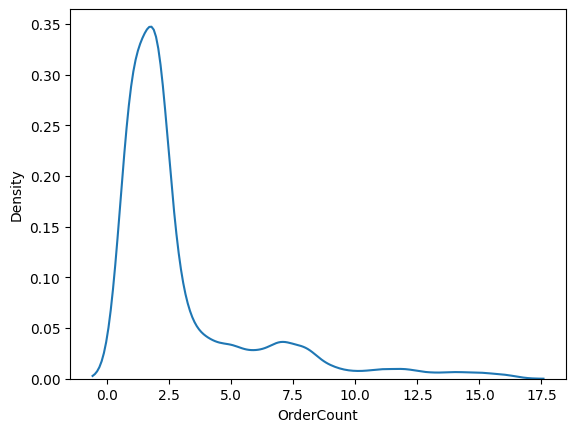

In [148]:
sns.kdeplot(df , x='OrderCount')

In [149]:
# Impute with KNN imputer
imputer_2 = KNNImputer(n_neighbors=2)
df['OrderCount']=imputer_2.fit_transform(df[['OrderCount']])

<Axes: xlabel='OrderCount', ylabel='Density'>

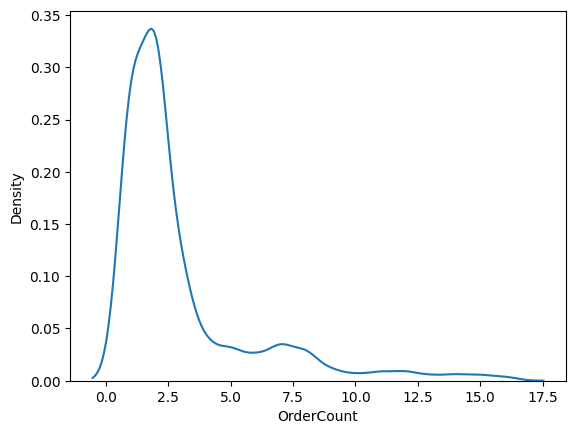

In [150]:
sns.kdeplot(df , x='OrderCount')

In [151]:
df['OrderCount'].isnull().sum()

0

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

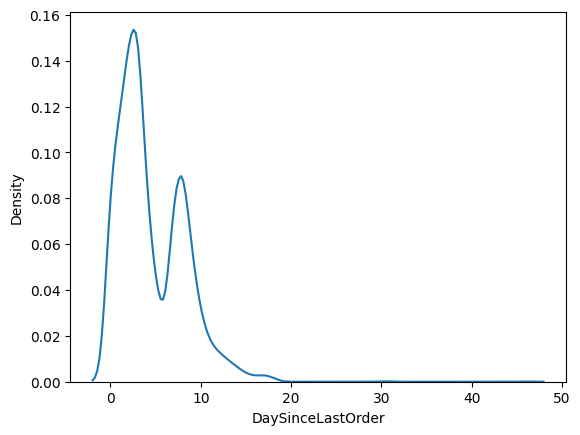

In [152]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [153]:
# impute with bfill Method
df['DaySinceLastOrder'] = df['DaySinceLastOrder'].fillna(method = 'bfill')

<Axes: xlabel='DaySinceLastOrder', ylabel='Density'>

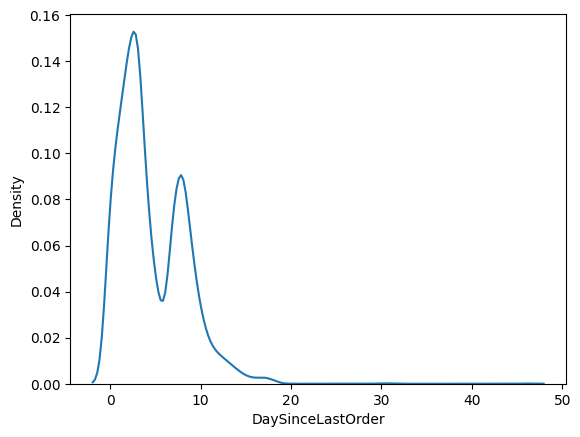

In [154]:
sns.kdeplot(df , x='DaySinceLastOrder')

In [155]:
df['DaySinceLastOrder'].isnull().sum()

0

In [156]:
# After we Checked the data the Customer ID Column not important for our Models so We drop it
df.drop('CustomerID' , axis = 1 , inplace = True)

In [157]:
df.shape

(5630, 19)

## Encoding

In [158]:
# check before encoding that my catogries for my columns are limited
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('*' * 40)


PreferredLoginDevice
Mobile Phone    3996
Computer        1634
Name: count, dtype: int64
****************************************
PreferredPaymentMode
Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: count, dtype: int64
****************************************
Gender
Male      3384
Female    2246
Name: count, dtype: int64
****************************************
PreferedOrderCat
Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: count, dtype: int64
****************************************
MaritalStatus
Married     2986
Single      1796
Divorced     848
Name: count, dtype: int64
****************************************


In [159]:
# cat columns
data = df[df.select_dtypes(exclude=np.number).columns]
data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single
1,Mobile Phone,UPI,Male,Mobile Phone,Single
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single
3,Mobile Phone,Debit Card,Male,Laptop & Accessory,Single
4,Mobile Phone,Credit Card,Male,Mobile Phone,Single
...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married
5626,Mobile Phone,Credit Card,Male,Fashion,Married
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married
5628,Computer,Credit Card,Male,Laptop & Accessory,Married


In [160]:
le = LabelEncoder()

In [161]:
# Encode for cat_cols
for i in df.columns:
  if df[i].dtype == 'object':
    df[i] = le.fit_transform(df[i])

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


In [162]:
for i in data.columns:
    data[i] = le.fit_transform(data[i])

data.head(4)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
0,1,2,0,2,2
1,1,4,1,3,2
2,1,2,1,3,2
3,1,2,1,2,2


## Handling Outliers

In [163]:
df.dtypes

,0
Churn,int64
Tenure,float64
PreferredLoginDevice,int64
CityTier,int64
WarehouseToHome,float64
PreferredPaymentMode,int64
Gender,int64
HourSpendOnApp,float64
NumberOfDeviceRegistered,int64
PreferedOrderCat,int64


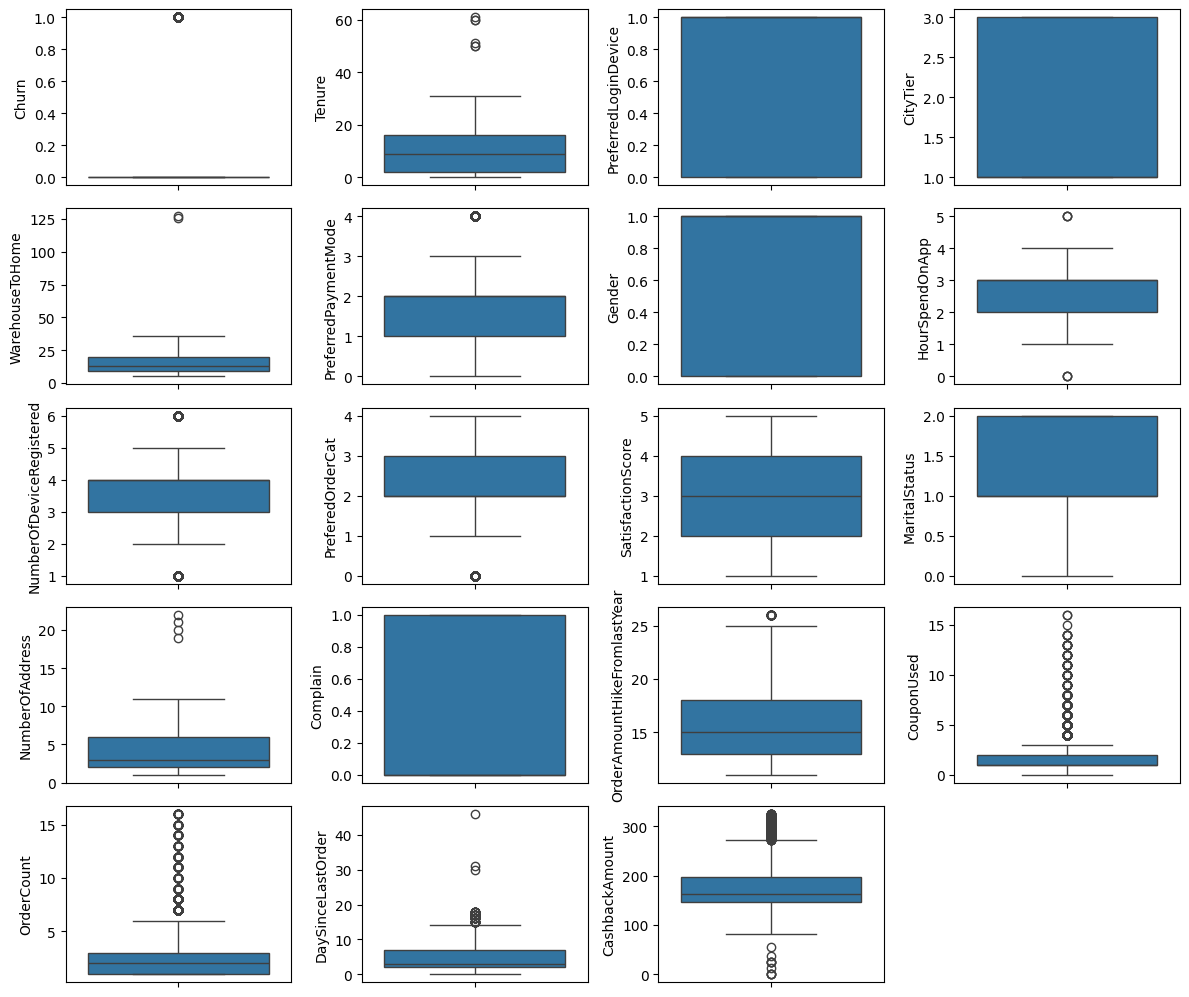

In [164]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

In [165]:
# lets detect True Outliers
def handle_outliers(df , column_name):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1

  # Define Upper and lower boundaries
  Upper = Q3 + IQR * 1.5
  lower = Q1 - IQR * 1.5

  # lets make filter for col values
  new_df = df[ (df[column_name] > lower) & (df[column_name] < Upper) ]

  return new_df

In [166]:
df.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [167]:
# lets Give our Functions columns contains outlier
cols_outliers = ['Tenure' , 'WarehouseToHome' , 'NumberOfAddress' , 'DaySinceLastOrder' , 'HourSpendOnApp' , 'NumberOfDeviceRegistered']

for col in cols_outliers:
    df = handle_outliers(df , col)

df.head(4)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07


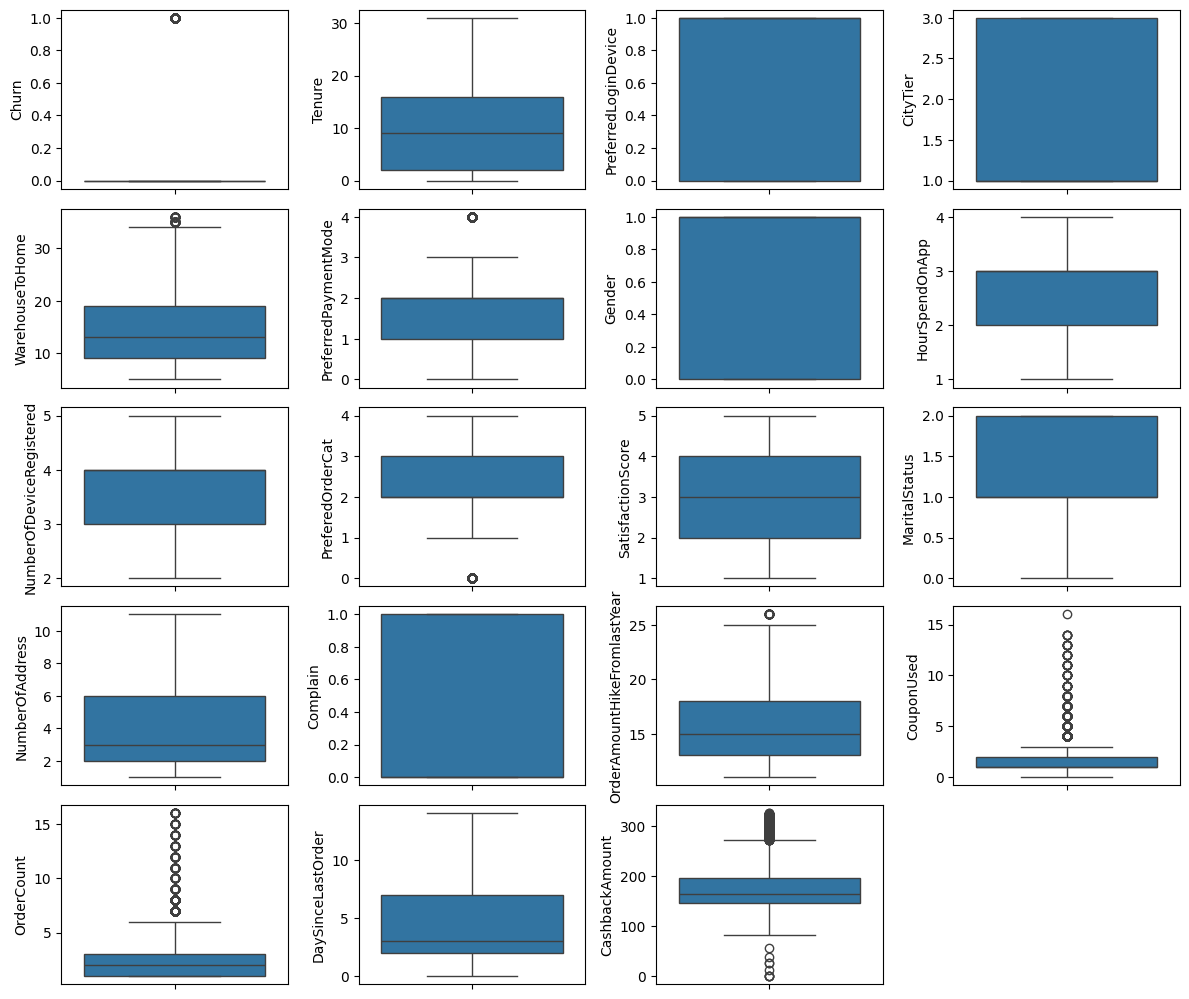

In [168]:
fig = plt.figure(figsize=(12,18))
for i in range(len(df.columns)):
    fig.add_subplot(9,4,i+1)
    sns.boxplot(y=df.iloc[:,i])

plt.tight_layout()
plt.show()

#### we made Trim on cols that contains outliers but after we check we saw many inforamtion deleted so we made Trimming only on cols that not conatins many outliers

In [169]:
corr_matrix = df.corr()
corr_matrix

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
Churn,1.000000,-0.336058,-0.041250,0.069595,0.054768,-0.005156,0.038193,0.001487,0.079116,0.105149,0.108600,0.131982,0.033703,0.252346,-0.002545,-0.017914,-0.036568,-0.164448,-0.165008
Tenure,-0.336058,1.000000,0.034596,-0.065933,-0.011849,-0.016797,-0.054684,-0.012859,-0.019592,-0.180637,-0.013331,-0.111074,0.240939,-0.023903,0.017177,0.127314,0.181138,0.164444,0.453981
PreferredLoginDevice,-0.041250,0.034596,1.000000,0.010097,-0.015852,0.009610,-0.012892,0.022246,-0.005323,0.005137,0.037642,-0.020207,0.033310,0.005983,-0.005296,-0.015940,-0.021975,-0.027906,0.042321
CityTier,0.069595,-0.065933,0.010097,1.000000,0.014636,0.251539,-0.022759,-0.010524,0.007282,-0.164040,-0.009735,0.002254,-0.033363,0.006312,-0.022135,0.017139,0.035656,0.023394,0.044946
WarehouseToHome,0.054768,-0.011849,-0.015852,0.014636,1.000000,0.008046,-0.015904,0.077833,0.029049,-0.114357,0.013783,-0.028226,0.001173,0.022052,0.028927,0.013175,0.016235,0.044883,0.036318
PreferredPaymentMode,-0.005156,-0.016797,0.009610,0.251539,0.008046,1.000000,0.020086,-0.005278,0.012908,-0.030738,-0.018085,-0.024158,0.003223,0.028288,-0.000268,-0.008582,-0.039249,-0.003581,0.034381
Gender,0.038193,-0.054684,-0.012892,-0.022759,-0.015904,0.020086,1.000000,-0.011553,-0.020954,0.060969,-0.037348,-0.019975,-0.030577,-0.030350,-0.007694,-0.026477,-0.031097,-0.027594,-0.024311
HourSpendOnApp,0.001487,-0.012859,0.022246,-0.010524,0.077833,-0.005278,-0.011553,1.000000,0.270333,0.030380,0.030875,-0.039032,0.134213,-0.003056,0.096706,0.181419,0.107000,0.081835,0.115280
NumberOfDeviceRegistered,0.079116,-0.019592,-0.005323,0.007282,0.029049,0.012908,-0.020954,0.270333,1.000000,-0.011521,-0.001042,0.037437,0.071084,-0.002056,0.061287,0.135974,0.092487,0.026054,0.120031
PreferedOrderCat,0.105149,-0.180637,0.005137,-0.164040,-0.114357,-0.030738,0.060969,0.030380,-0.011521,1.000000,-0.002726,0.042430,-0.096412,-0.000339,0.001494,-0.153064,-0.179645,-0.235615,-0.340988


<Axes: >

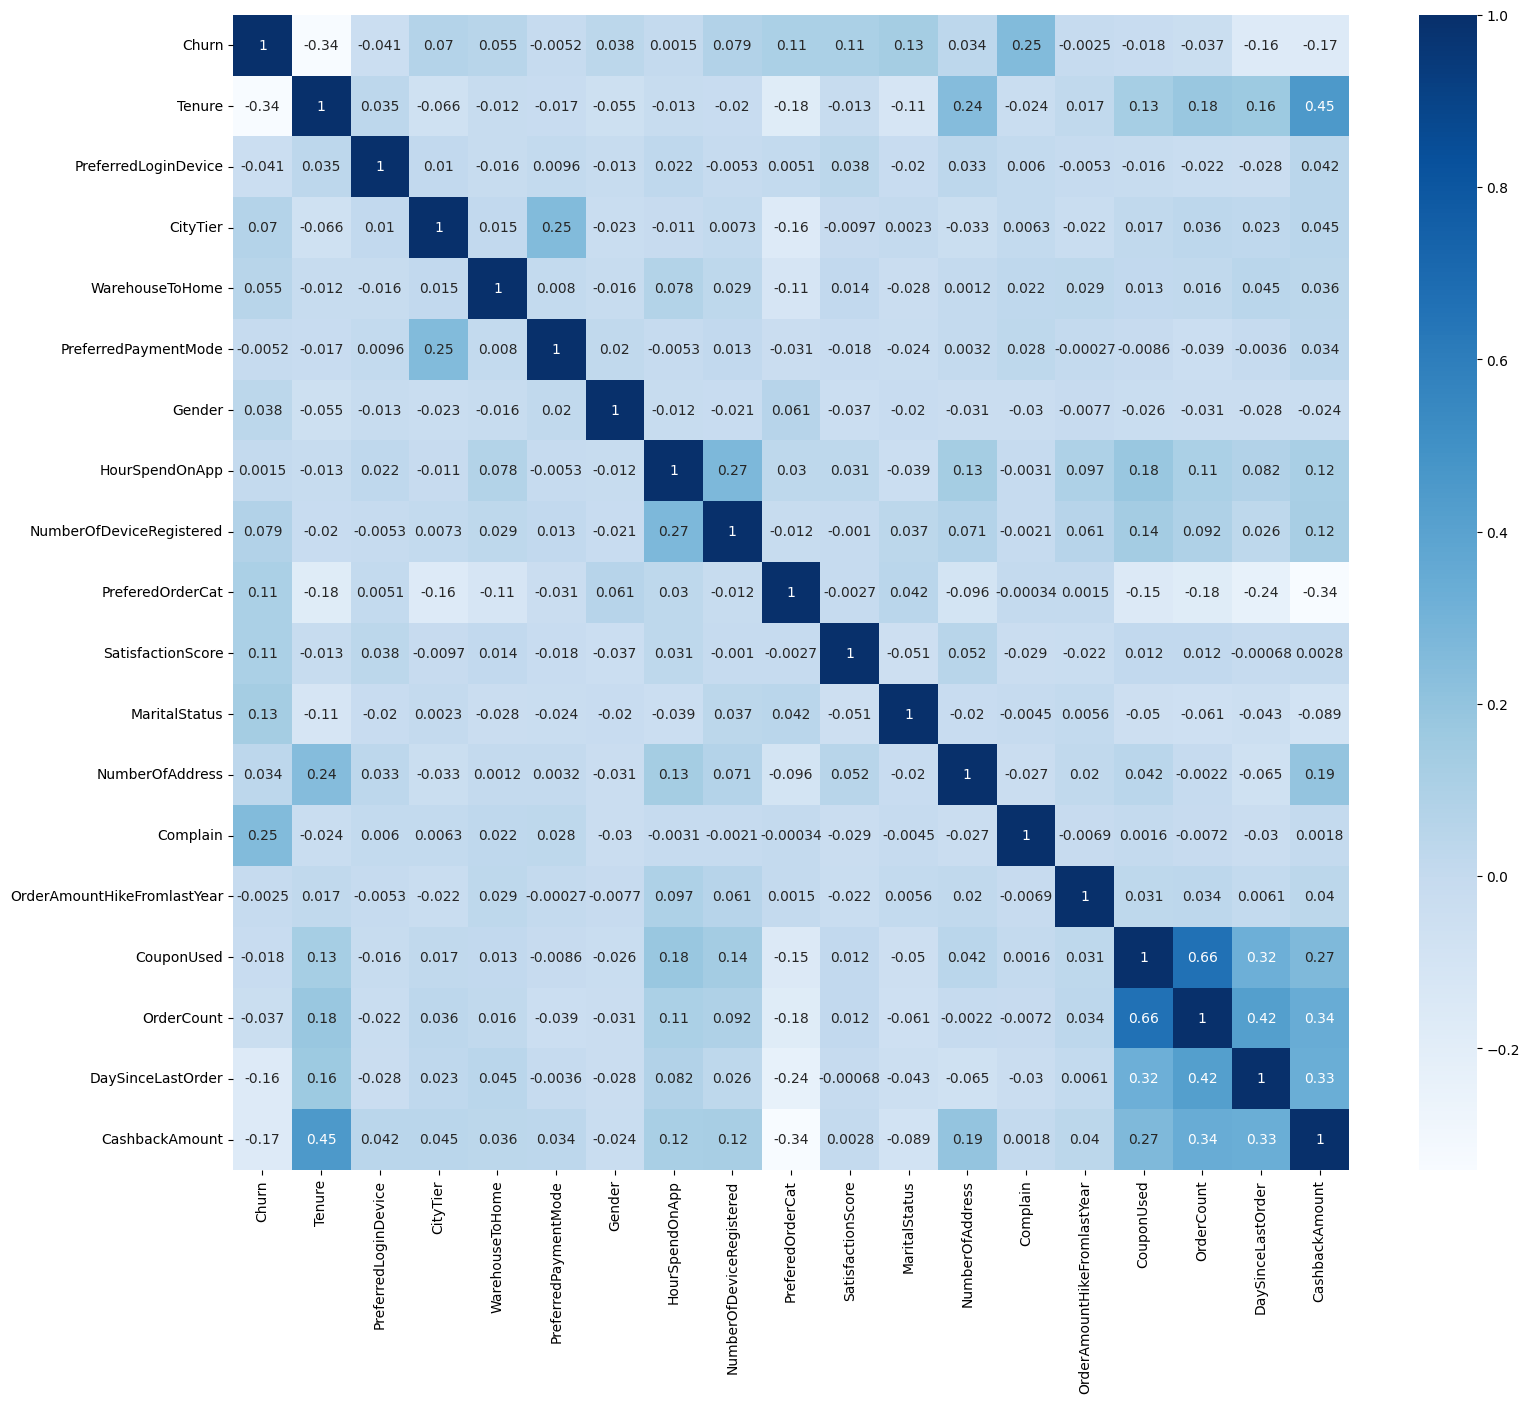

In [170]:
plt.figure(figsize = (18,15))
sns.heatmap(df.corr() , annot = True , cmap = 'Blues')

In [171]:
churn_corr_vector = corr_matrix['Churn'].sort_values(ascending = False)
churn_corr_vector

,Churn
Churn,1.000000
Complain,0.252346
MaritalStatus,0.131982
SatisfactionScore,0.108600
PreferedOrderCat,0.105149
NumberOfDeviceRegistered,0.079116
CityTier,0.069595
WarehouseToHome,0.054768
Gender,0.038193
NumberOfAddress,0.033703


Text(0.5, 1.0, 'Relation Between Features and target')

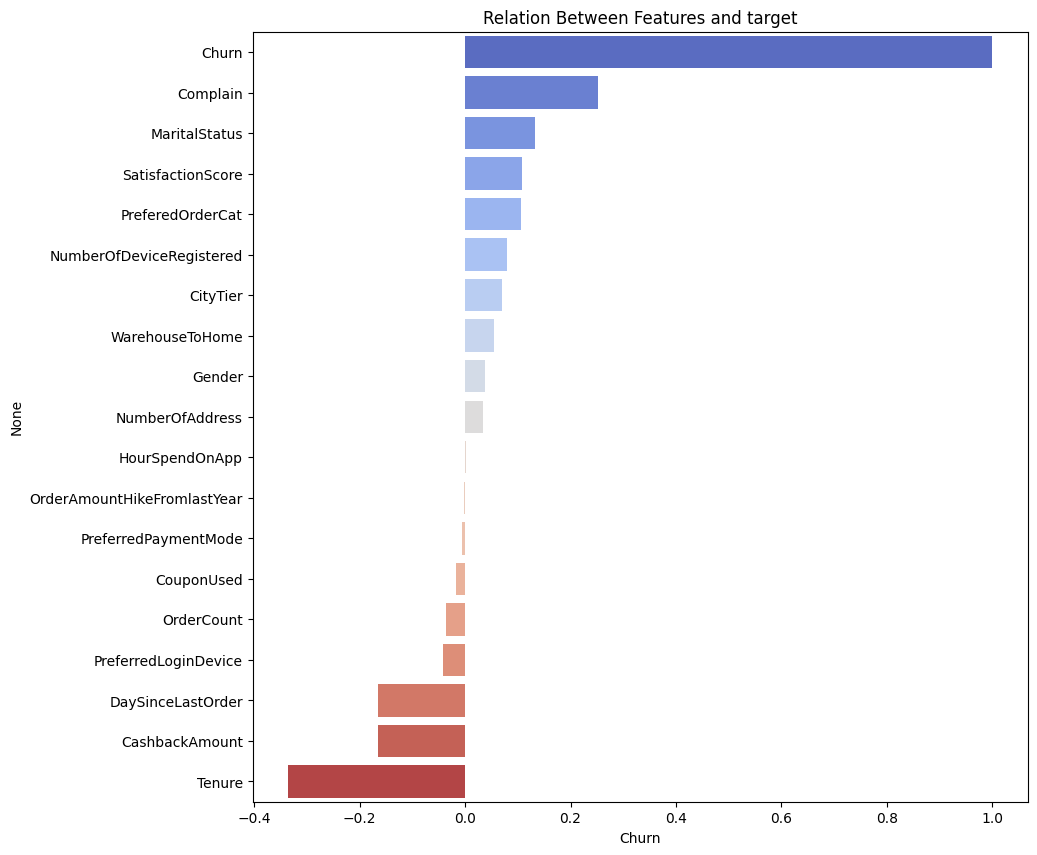

In [172]:
plt.figure(figsize = (10,10))
sns.barplot(x = churn_corr_vector , y = churn_corr_vector.index , palette = 'coolwarm')
plt.title('Relation Between Features and target')

Correlation measures the strength of the relationship between features and the target variable (for numerical or ordinal data).

In [173]:
import pandas as pd

X = df.drop('Churn', axis=1)  # Features
y = df['Churn']              # Target

# Calculate Correlation
correlation = X.corrwith(y)

# Create DataFrame for Feature Importance
feature_importance_corr = pd.DataFrame({
    'Feature': X.columns,
    'Correlation': correlation.abs()
}).sort_values(by='Correlation', ascending=False)

print("Feature Importance Using Correlation:")
print(feature_importance_corr)


Feature Importance Using Correlation:
                                                 Feature  Correlation
Tenure                                            Tenure     0.336058
Complain                                        Complain     0.252346
CashbackAmount                            CashbackAmount     0.165008
DaySinceLastOrder                      DaySinceLastOrder     0.164448
MaritalStatus                              MaritalStatus     0.131982
SatisfactionScore                      SatisfactionScore     0.108600
PreferedOrderCat                        PreferedOrderCat     0.105149
NumberOfDeviceRegistered        NumberOfDeviceRegistered     0.079116
CityTier                                        CityTier     0.069595
WarehouseToHome                          WarehouseToHome     0.054768
PreferredLoginDevice                PreferredLoginDevice     0.041250
Gender                                            Gender     0.038193
OrderCount                                    OrderC

Mutual Information measures the dependency between features and the target. It's useful for both categorical and continuous features.

In [174]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import MinMaxScaler

# Normalize Features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Calculate Mutual Information
mi = mutual_info_classif(X_scaled, y, random_state=42)

# Create DataFrame for Feature Importance
feature_importance_mi = pd.DataFrame({
    'Feature': X.columns,
    'Mutual Information': mi
}).sort_values(by='Mutual Information', ascending=False)

print("Feature Importance Using Mutual Information:")
print(feature_importance_mi)


Feature Importance Using Mutual Information:
                        Feature  Mutual Information
17               CashbackAmount            0.133323
0                        Tenure            0.106083
12                     Complain            0.028274
8              PreferedOrderCat            0.021530
16            DaySinceLastOrder            0.021067
10                MaritalStatus            0.014081
14                   CouponUsed            0.009671
13  OrderAmountHikeFromlastYear            0.007340
9             SatisfactionScore            0.007008
15                   OrderCount            0.006279
3               WarehouseToHome            0.003509
2                      CityTier            0.000855
11              NumberOfAddress            0.000130
1          PreferredLoginDevice            0.000000
6                HourSpendOnApp            0.000000
7      NumberOfDeviceRegistered            0.000000
4          PreferredPaymentMode            0.000000
5                  

The Chi-Square test assesses the dependency between categorical features and the target variable.

In [175]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

# Encode Categorical Features and Target
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Calculate Chi-Square Statistics
chi_scores, p_values = chi2(X_encoded, y_encoded)

# Create DataFrame for Feature Importance
feature_importance_chi = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi_scores,
    'p-value': p_values
}).sort_values(by='Chi-Square Score', ascending=False)

print("Feature Importance Using Chi-Square Test:")
print(feature_importance_chi)


Feature Importance Using Chi-Square Test:
                        Feature  Chi-Square Score       p-value
17               CashbackAmount      69988.934457  0.000000e+00
0                        Tenure       4080.162128  0.000000e+00
16            DaySinceLastOrder        353.914815  5.951775e-79
12                     Complain        234.463779  6.337332e-53
3               WarehouseToHome         99.537520  1.924820e-23
9             SatisfactionScore         55.762660  8.177000e-14
15                   OrderCount         39.693350  2.971355e-10
10                MaritalStatus         34.408041  4.468732e-09
8              PreferedOrderCat         33.084797  8.822590e-09
2                      CityTier         31.822942  1.688861e-08
11              NumberOfAddress         11.932758  5.515546e-04
7      NumberOfDeviceRegistered         11.807970  5.897769e-04
14                   CouponUsed          4.270995  3.876823e-02
5                        Gender          3.023850  8.204848e-0

Variance Threshold identifies features with very low variance, which are unlikely to be predictive.

In [176]:
from sklearn.feature_selection import VarianceThreshold

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # Set threshold for low variance
selector.fit(X)

# Get Variances and Feature Names
variances = selector.variances_
feature_importance_variance = pd.DataFrame({
    'Feature': X.columns,
    'Variance': variances
}).sort_values(by='Variance', ascending=False)

print("Feature Importance Using Variance Threshold:")
print(feature_importance_variance)


Feature Importance Using Variance Threshold:
                        Feature     Variance
17               CashbackAmount  2367.512879
0                        Tenure    70.988402
3               WarehouseToHome    66.054423
13  OrderAmountHikeFromlastYear    13.521851
16            DaySinceLastOrder    11.230400
15                   OrderCount     7.747803
11              NumberOfAddress     6.561890
14                   CouponUsed     3.294673
9             SatisfactionScore     1.893258
8              PreferedOrderCat     1.214119
4          PreferredPaymentMode     1.030992
2                      CityTier     0.840643
7      NumberOfDeviceRegistered     0.636694
6                HourSpendOnApp     0.520318
10                MaritalStatus     0.447176
5                        Gender     0.240422
1          PreferredLoginDevice     0.206229
12                     Complain     0.204094


In [177]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif, chi2, VarianceThreshold

X = df.drop('Churn', axis=1)  # Feature columns
y = df['Churn']  # Target column

# 1. Calculate Correlation
correlation = X.corrwith(y).abs()
correlation_score = correlation

# 2. Calculate Mutual Information
mi = mutual_info_classif(X, y, random_state=42)
mi_score = pd.Series(mi, index=X.columns)

# 3. Calculate Chi-Square (Encode features as needed)
from sklearn.preprocessing import LabelEncoder
X_encoded = X.apply(LabelEncoder().fit_transform)  # Encoding for Chi-Square
chi_scores, p_values = chi2(X_encoded, y)
chi_square_score = pd.Series(chi_scores, index=X.columns)

# 4. Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # Threshold can be adjusted
selector.fit(X)
var_scores = pd.Series(selector.variances_, index=X.columns)

# Combine scores (weighted sum as an example)
weights = {
    'correlation': 0.25,
    'mutual_info': 0.25,
    'chi_square': 0.25,
    'variance': 0.25
}

# Normalize and compute the weighted scores
composite_score = (
    weights['correlation'] * correlation_score / correlation_score.max()
    + weights['mutual_info'] * mi_score / mi_score.max()
    + weights['chi_square'] * chi_square_score / chi_square_score.max()
    + weights['variance'] * var_scores / var_scores.max()
)

# Create a DataFrame with computed feature scores
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Composite Score': composite_score
}).sort_values(by='Composite Score', ascending=False)

print("Hybrid Feature Importance Scores:")
print(feature_importance_df)


Hybrid Feature Importance Scores:
                                                 Feature  Composite Score
CashbackAmount                            CashbackAmount         0.872752
Tenure                                            Tenure         0.470991
Complain                                        Complain         0.241601
DaySinceLastOrder                      DaySinceLastOrder         0.164289
MaritalStatus                              MaritalStatus         0.124759
PreferedOrderCat                        PreferedOrderCat         0.118841
SatisfactionScore                      SatisfactionScore         0.094775
NumberOfDeviceRegistered        NumberOfDeviceRegistered         0.058966
WarehouseToHome                          WarehouseToHome         0.054775
CityTier                                        CityTier         0.053433
OrderCount                                    OrderCount         0.040342
CouponUsed                                    CouponUsed         0.031824
Pref

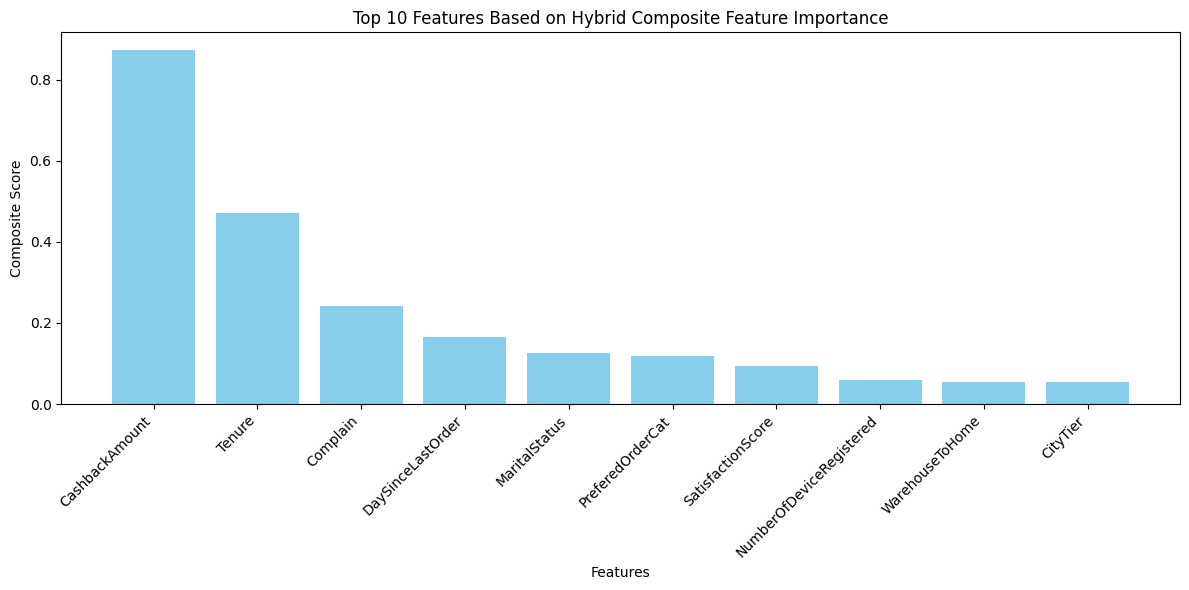

In [178]:
import matplotlib.pyplot as plt

# Visualize the top N features based on composite scores
top_n = 10  # Change this number depending on how many top features you want to visualize
top_features = feature_importance_df.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(top_features['Feature'], top_features['Composite Score'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Composite Score')
plt.title('Top 10 Features Based on Hybrid Composite Feature Importance')
plt.tight_layout()
plt.show()


In [179]:
import plotly.express as px
fig = px.histogram(df2, x="Churn", color="Churn" ,text_auto= True , title="<b>"+'Check Imbalance' , color_discrete_sequence = ['#BA1F33','#3A506B'])

# Customize the plot
fig.update_layout(hovermode='x',title_font_size=30)
fig.update_layout(
title_font_color="black",
template="plotly",
title_font_size=30,
hoverlabel_font_size=20,
title_x=0.5,
xaxis_title='Churn',
yaxis_title='count',
)
fig.show()

#### Our Data Imbalanced so lets make Over sample for it Using SMOTETomek

## Handling Imbalanced Data

In [180]:
X = df.drop('Churn' , axis = 1)
Y = df['Churn']

In [181]:
from imblearn.combine import SMOTETomek

In [182]:
smt = SMOTETomek(random_state=42)
x_over , y_over = smt.fit_resample(X , Y)

In [183]:
x_over.shape, y_over.shape

((8582, 18), (8582,))

In [184]:
df.isnull().sum()

,0
Churn,0
Tenure,0
PreferredLoginDevice,0
CityTier,0
WarehouseToHome,0
PreferredPaymentMode,0
Gender,0
HourSpendOnApp,0
NumberOfDeviceRegistered,0
PreferedOrderCat,0


In [185]:
df

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,1,3,6.0,2,0,3.0,3,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,0.0,1,1,8.0,4,1,3.0,4,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,1,0.0,1,1,30.0,2,1,2.0,4,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,1,3,15.0,2,1,2.0,4,2,5,2,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,1,12.0,1,1,4.0,3,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,0,1,30.0,1,1,3.0,2,2,1,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,1,1,13.0,1,1,3.0,5,0,5,1,6,0,16.0,1.0,2.0,4.0,224.91
5627,0,1.0,1,1,11.0,2,1,3.0,2,2,4,1,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,0,3,9.0,1,1,4.0,5,2,4,1,4,0,15.0,2.0,2.0,9.0,178.90


In [186]:
# Necessary imports
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


In [187]:
# Subset only the features you want to use
selected_features = [
    'CashbackAmount', 'Tenure', 'Complain', 'DaySinceLastOrder',
    'MaritalStatus', 'PreferedOrderCat', 'SatisfactionScore',
    'NumberOfDeviceRegistered', 'WarehouseToHome', 'CityTier'
]

# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek

X = df.drop('Churn', axis=1)  # Features
Y = df['Churn']  # Target variable

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

# Apply SMOTETomek resampling to balance classes in the training data
smt = SMOTETomek(random_state=42)
X_train_resampled, Y_train_resampled = smt.fit_resample(X_train, Y_train)

# Scale only the training and test features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)  # Scale training features
X_test_scaled = scaler.transform(X_test)  # Scale test features

# Split the resampled training data into a validation set for evaluation purposes
X_train_final, X_val_scaled, Y_train_final, Y_val = train_test_split(
    X_train_scaled, Y_train_resampled, test_size=0.2, random_state=42, stratify=Y_train_resampled
)

# Ensure final variables are ready for the model
print("Training features shape:", X_train_scaled.shape)
print("Validation features shape:", X_val_scaled.shape)
print("Test features shape:", X_test_scaled.shape)
print("Training target shape:", Y_train_resampled.shape)
print("Validation target shape:", Y_val.shape)
print("Test target shape:", Y_test.shape)


Training features shape: (6862, 18)
Validation features shape: (1373, 18)
Test features shape: (1031, 18)
Training target shape: (6862,)
Validation target shape: (1373,)
Test target shape: (1031,)


In [188]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize AdaBoost
ab = AdaBoostClassifier(random_state=42)

# Hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search_ab = GridSearchCV(
    ab, param_grid, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_ab.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_ab.best_params_)
print("Validation Score:", grid_search_ab.best_score_)

# Evaluate the model on the test set
y_test_pred_ab = grid_search_ab.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_ab))

# Save the best AdaBoost model
joblib.dump(grid_search_ab.best_estimator_, 'adaboost_model.pkl')


Best hyperparameters: {'learning_rate': 1, 'n_estimators': 150}
Validation Score: 0.8796440727992373
Test Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       858
           1       0.60      0.68      0.64       173

    accuracy                           0.87      1031
   macro avg       0.76      0.79      0.78      1031
weighted avg       0.88      0.87      0.87      1031



['adaboost_model.pkl']

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)

# Hyperparameter tuning
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear']
}

grid_search_lr = GridSearchCV(
    lr, param_grid_lr, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_lr.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_lr.best_params_)
print("Validation Score:", grid_search_lr.best_score_)

# Evaluate the model on the test set
y_test_pred_lr = grid_search_lr.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_lr))

# Save the best Logistic Regression model
joblib.dump(grid_search_lr.best_estimator_, 'logistic_regression_model.pkl')


Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Validation Score: 0.7602761716485575
Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.85       858
           1       0.40      0.75      0.52       173

    accuracy                           0.77      1031
   macro avg       0.67      0.76      0.69      1031
weighted avg       0.85      0.77      0.79      1031



['logistic_regression_model.pkl']

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search_rf = GridSearchCV(
    rf, param_grid_rf, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_rf.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_rf.best_params_)
print("Validation Score:", grid_search_rf.best_score_)

# Evaluate the model on the test set
y_test_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_rf))

# Save the best Random Forest model
joblib.dump(grid_search_rf.best_estimator_, 'random_forest_model.pkl')


Best hyperparameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}
Validation Score: 0.9404040650699985
Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       858
           1       0.75      0.79      0.77       173

    accuracy                           0.92      1031
   macro avg       0.85      0.87      0.86      1031
weighted avg       0.92      0.92      0.92      1031



['random_forest_model.pkl']

In [190]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Hyperparameter tuning
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search_xgb = GridSearchCV(
    xgb, param_grid_xgb, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_xgb.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_xgb.best_params_)
print("Validation Score:", grid_search_xgb.best_score_)

# Evaluate the model on the test set
y_test_pred_xgb = grid_search_xgb.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_xgb))

# Save the best XGBoost model
joblib.dump(grid_search_xgb.best_estimator_, 'xgboost_model.pkl')


Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}
Validation Score: 0.9669297934552032
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       858
           1       0.92      0.87      0.89       173

    accuracy                           0.97      1031
   macro avg       0.95      0.93      0.94      1031
weighted avg       0.96      0.97      0.96      1031



['xgboost_model.pkl']

In [193]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize SVC
svc = SVC(random_state=42)

# Hyperparameter tuning
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svc = GridSearchCV(
    svc, param_grid_svc, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_svc.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_svc.best_params_)
print("Validation Score:", grid_search_svc.best_score_)

# Evaluate the model on the test set
y_test_pred_svc = grid_search_svc.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_svc))

# Save the best SVC model
joblib.dump(grid_search_svc.best_estimator_, 'svc_model.pkl')


Best hyperparameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Validation Score: 0.9676498442473441
Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       858
           1       0.84      0.88      0.86       173

    accuracy                           0.95      1031
   macro avg       0.91      0.92      0.92      1031
weighted avg       0.95      0.95      0.95      1031



['svc_model.pkl']

In [192]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
import joblib

# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

# Hyperparameter tuning
param_grid_dt = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}

grid_search_dt = GridSearchCV(
    dt, param_grid_dt, cv=5, n_jobs=-1, scoring="accuracy"
)

# Fit the model
grid_search_dt.fit(X_train_scaled, Y_train_resampled)

# Best hyperparameters and validation score
print("Best hyperparameters:", grid_search_dt.best_params_)
print("Validation Score:", grid_search_dt.best_score_)

# Evaluate the model on the test set
y_test_pred_dt = grid_search_dt.best_estimator_.predict(X_test_scaled)
print("Test Classification Report:")
print(classification_report(Y_test, y_test_pred_dt))

# Save the best Decision Tree model
joblib.dump(grid_search_dt.best_estimator_, 'decision_tree_model.pkl')


Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Validation Score: 0.924373114140048
Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       858
           1       0.76      0.84      0.79       173

    accuracy                           0.93      1031
   macro avg       0.86      0.89      0.88      1031
weighted avg       0.93      0.93      0.93      1031



['decision_tree_model.pkl']

Combining models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load models
svc_model = joblib.load('svc_model.pkl')
rf_model = joblib.load('random_forest_model.pkl')
dt_model = joblib.load('decision_tree_model.pkl')
xgb_model = joblib.load('xgboost_model.pkl')
adaboost_model = joblib.load('adaboost_model.pkl')
logreg_model = joblib.load('logistic_regression_model.pkl')

# Evaluate each model on test data
models = {
    'SVC': svc_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model,
    'XGBoost': xgb_model,
    'AdaBoost': adaboost_model,
    'Logistic Regression': logreg_model
}

for model_name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {model_name}")
    print("Test Accuracy:", accuracy_score(Y_test, y_pred))
    print("Classification Report:")
    print(classification_report(Y_test, y_pred))
    print('-' * 50)


| Model              | Test Accuracy | Strengths                                                      | Weaknesses                                                   |
|---------------------|---------------|----------------------------------------------------------------|-------------------------------------------------------------|
| **SVC**            | 0.8416        | High precision for non-churn cases.                            | Struggles with recall for churn predictions and slower on large datasets. |
| **Random Forest**   | 0.9011        | Robust to overfitting and handles class imbalances.            | Slower with very large feature sets.                        |
| **Decision Tree**   | 0.8908        | Easy interpretability and rule-based logic.                    | Prone to overfitting unless tuned.                          |
| **XGBoost**         | 0.9231        | Handles complex patterns well and provides the best performance overall. | Computationally expensive and requires fine-tuning.         |
| **AdaBoost**        | 0.8403        | Combines weak learners well.                                   | Struggles with imbalanced classes.                          |
| **Logistic Regression** | 0.7434    | Simple, fast, and interpretable.                               | Performs poorly for non-linear data patterns and imbalanced datasets. |


Ensemble Approach - we combine prediction of model unlike meta learner which combines only outcomes of model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Initialize models
rf_model = RandomForestClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
dt_model = DecisionTreeClassifier(random_state=42)
ab_model = AdaBoostClassifier(random_state=42)
svc_model = SVC(probability=True, random_state=42)

# Fit models on the training data
rf_model.fit(X_train_scaled, Y_train_resampled)
xgb_model.fit(X_train_scaled, Y_train_resampled)
dt_model.fit(X_train_scaled, Y_train_resampled)
ab_model.fit(X_train_scaled, Y_train_resampled)
svc_model.fit(X_train_scaled, Y_train_resampled)

# Generate predictions from all models
rf_preds = rf_model.predict_proba(X_test_scaled)[:, 1]
xgb_preds = xgb_model.predict_proba(X_test_scaled)[:, 1]
dt_preds = dt_model.predict_proba(X_test_scaled)[:, 1]
ab_preds = ab_model.predict_proba(X_test_scaled)[:, 1]
svc_preds = svc_model.predict_proba(X_test_scaled)[:, 1]


In [ ]:
# Set weights for the models
weights = {
    "Random Forest": 0.25,
    "XGBoost": 0.25,
    "Decision Tree": 0.2,
    "AdaBoost": 0.15,
    "SVC": 0.15,
}

# Weighted sum of predictions
weighted_preds = (
    weights["Random Forest"] * rf_preds +
    weights["XGBoost"] * xgb_preds +
    weights["Decision Tree"] * dt_preds +
    weights["AdaBoost"] * ab_preds +
    weights["SVC"] * svc_preds
)

# Final predicted probabilities
meta_preds = weighted_preds


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate weighted ensemble performance
final_predictions = (meta_preds > 0.5).astype(int)  # Threshold at 0.5 for classification
accuracy = accuracy_score(Y_test, final_predictions)
report = classification_report(Y_test, final_predictions)

print(f"Ensemble Accuracy: {accuracy}")
print("Classification Report:\n", report)


The ensemble approach is proving effective for churn prediction, with a strong overall accuracy (~91.85%) and a well-balanced performance across classes. This method capitalizes on the collective strengths of multiple models, smoothing out individual weaknesses and biases.

In [ ]:
!pip install shap


In [ ]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


In [ ]:
!pip install xgboost --upgrade


In [ ]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Train classifiers with appropriate parameters
rf_model = RandomForestClassifier(random_state=42)  # Random Forest defaults
xgb_model = XGBClassifier(tree_method="gpu_hist", random_state=42)  # XGBoost with GPU
dt_model = DecisionTreeClassifier(random_state=42)  # Decision Tree defaults
adaboost_model = AdaBoostClassifier(random_state=42)  # AdaBoost defaults
svc_model = SVC(probability=True, random_state=42)  # SVC with probability estimates


In [ ]:
rf_model.fit(X_train_scaled, Y_train_resampled)
xgb_model.fit(X_train_scaled, Y_train_resampled)
dt_model.fit(X_train_scaled, Y_train_resampled)
adaboost_model.fit(X_train_scaled, Y_train_resampled)
svc_model.fit(X_train_scaled, Y_train_resampled)


In [ ]:
weights = {
    "Random Forest": 0.2,
    "XGBoost": 0.4,
    "Decision Tree": 0.1,
    "AdaBoost": 0.2,
    "SVC": 0.1
}

def ensemble_predict(X):
    # Compute weighted predictions
    rf_preds = rf_model.predict_proba(X)[:, 1]
    xgb_preds = xgb_model.predict_proba(X)[:, 1]
    dt_preds = dt_model.predict_proba(X)[:, 1]
    adaboost_preds = adaboost_model.predict_proba(X)[:, 1]
    svc_preds = svc_model.predict_proba(X)[:, 1]

    # Weighted combination
    final_preds = (
        weights["Random Forest"] * rf_preds +
        weights["XGBoost"] * xgb_preds +
        weights["Decision Tree"] * dt_preds +
        weights["AdaBoost"] * adaboost_preds +
        weights["SVC"] * svc_preds
    )

    # Ensure shape is compatible for SHAP explanations
    return final_preds.reshape(-1, 1)


In [ ]:
import shap

# Limit the data for faster computation (GPU-friendly subset)
num_samples = 500  # Adjust this depending on GPU availability
explainer = shap.Explainer(ensemble_predict, X_test_scaled[:num_samples])

# Generate SHAP values
shap_values = explainer(X_test_scaled[:num_samples])

# Visualize SHAP summary
shap.summary_plot(shap_values)


In [ ]:
# Summarize statistics
shap_values_mean = shap_values.values.mean(axis=0)  # Mean SHAP values for each model
shap_values_min = shap_values.values.min(axis=0)  # Minimum SHAP value
shap_values_max = shap_values.values.max(axis=0)  # Maximum SHAP value

# Extract positive/negative contributions summed per feature across all rows
positive_contributions = np.array([shap_values.values[:, i][shap_values.values[:, i] > 0].sum() for i in range(shap_values.values.shape[1])])
negative_contributions = np.array([shap_values.values[:, i][shap_values.values[:, i] < 0].sum() for i in range(shap_values.values.shape[1])])

# Model names corresponding to ensemble components
shap_feature_names = ["Random Forest", "XGBoost", "Decision Tree", "AdaBoost", "SVC"]

# Print textual analysis
print("\n================= Feature Importance Analysis (Textual) =================\n")
for i, feature in enumerate(shap_feature_names):
    print(f"{feature}:")
    print(f"  - Mean SHAP value: {shap_values_mean[i]:.4f}")  # Average feature importance
    print(f"  - Min SHAP value: {shap_values_min[i]:.4f}")  # Lowest observed SHAP value
    print(f"  - Max SHAP value: {shap_values_max[i]:.4f}")  # Highest observed SHAP value
    print(f"  - Positive Contribution Impact: {positive_contributions[i]:.4f}")  # Sum of only positive SHAP contributions
    print(f"  - Negative Contribution Impact: {negative_contributions[i]:.4f}")  # Sum of only negative SHAP contributions
    print("-" * 60)

# Summarize overall prediction impact
overall_positive_impact = shap_values.values[shap_values.values > 0].sum()
overall_negative_impact = shap_values.values[shap_values.values < 0].sum()

print("\n===================================================================")
print(f"Total Positive Contribution across all SHAP values: {overall_positive_impact:.4f}")
print(f"Total Negative Contribution across all SHAP values: {overall_negative_impact:.4f}")
print("===================================================================")


| Model           | Mean SHAP Value | Min SHAP Value | Max SHAP Value | Positive Contribution Impact | Negative Contribution Impact |
|------------------|-----------------|----------------|----------------|-----------------------------|-----------------------------|
| **Random Forest** | -0.0004        | -0.1665        | 0.3083         | 8.5610                      | -8.7577                    |
| **XGBoost**       | 0.0062         | -0.2792        | 0.4459         | 33.2604                     | -30.1455                   |
| **Decision Tree** | -0.0107        | -0.1251        | 0.1889         | 7.8562                      | -13.2069                   |
| **AdaBoost**      | 0.0035         | -0.1290        | 0.1886         | 7.8881                      | -6.1456                    |
| **SVC**           | -0.0010        | -0.0587        | 0.0957         | 2.6317                      | -3.1074                    |


In [ ]:
# Correcting SHAP values handling
if hasattr(shap_values, "values"):
    shap_values_corrected = shap_values.values  # Access SHAP values array
else:
    shap_values_corrected = shap_values  # Already in array form

# Top features for dependence plots
top_features = np.argsort(-np.abs(shap_values_corrected.mean(axis=0)))[:3]  # Indices of top 3 features
for i in top_features:
    feature_name = feature_names[i]
    print(f"Generating dependence plot for feature: {feature_name}")

    # Generate dependence plot
    shap.dependence_plot(i, shap_values_corrected, X_test_scaled[:num_samples], feature_names=feature_names)


In [ ]:
# Access the SHAP values array
shap_values_array = shap_values.values  # Extract the actual SHAP values (numpy array)

# Check the shape of the extracted SHAP values
print(f"SHAP values array shape: {shap_values_array.shape}")

# Initialize a results dictionary
feature_insights = {}

# Loop through each feature
for feature_index, feature_name in enumerate(feature_names):
    # Extract SHAP values for the current feature
    shap_values_feature = shap_values_array[:, feature_index]

    # Calculate numerical statistics
    mean_shap = np.mean(shap_values_feature)
    min_shap = np.min(shap_values_feature)
    max_shap = np.max(shap_values_feature)
    positive_impact = np.sum(shap_values_feature[shap_values_feature > 0])
    negative_impact = np.sum(shap_values_feature[shap_values_feature < 0])

    # Store the insights for the feature
    feature_insights[feature_name] = {
        "Mean SHAP Value": mean_shap,
        "Min SHAP Value": min_shap,
        "Max SHAP Value": max_shap,
        "Total Positive Contribution": positive_impact,
        "Total Negative Contribution": negative_impact
    }

# Display the insights
for feature_name, stats in feature_insights.items():
    print(f"\nNumerical Insights for Feature: {feature_name}")
    for stat_name, stat_value in stats.items():
        print(f"  - {stat_name}: {stat_value:.4f}")


| Feature                    | Mean SHAP Value | Min SHAP Value | Max SHAP Value | Positive Contribution | Negative Contribution |
|----------------------------|-----------------|----------------|----------------|-----------------------|-----------------------|
| **CashbackAmount**         | -0.0004         | -0.1665        | 0.3083         | 8.5610                | -8.7577              |
| **Tenure**                 | 0.0062          | -0.2792        | 0.4459         | 33.2604               | -30.1455             |
| **Complain**               | -0.0107         | -0.1251        | 0.1889         | 7.8562                | -13.2069             |
| **DaySinceLastOrder**      | 0.0035          | -0.1290        | 0.1886         | 7.8881                | -6.1456              |
| **MaritalStatus**          | -0.0010         | -0.0587        | 0.0957         | 2.6317                | -3.1074              |
| **PreferedOrderCat**       | -0.0005         | -0.0944        | 0.1119         | 3.5999                | -3.8650              |
| **SatisfactionScore**      | -0.0027         | -0.1225        | 0.0676         | 4.5594                | -5.8944              |
| **NumberOfDeviceRegistered** | 0.0006       | -0.1485        | 0.0493         | 2.4691                | -2.1548              |
| **WarehouseToHome**        | -0.0023         | -0.1128        | 0.1683         | 6.3370                | -7.4695              |
| **CityTier**               | -0.0009         | -0.0894        | 0.1392         | 2.9942                | -3.4626              |


The feature importance analysis across the models shows how much each model relies on different features to make decisions and the direction of their influence. Let's break it down model by model in simpler terms.

1. **Random Forest**: This model has a very small average influence from its features (-0.0004), meaning that the features, on average, don't contribute much to the model's decisions. The range of SHAP values (-0.1665 to 0.3083) indicates that certain features had both negative and positive effects. However, it has a higher amount of negative impact (-8.7577) compared to its positive impact (8.5610), showing it leans slightly more on negative feature effects to make decisions.

2. **XGBoost**: This model stands out with a positive mean SHAP value of 0.0062. It shows that features have a greater positive influence here, with a range between -0.2792 and 0.4459. XGBoost relies heavily on features having both strong positive and negative effects, but the **positive contribution (33.2604)** is significantly higher compared to its negative counterpart (-30.1455). This means XGBoost is finding patterns in features that have a strong influence, especially positive ones, helping it make its decisions effectively.

3. **Decision Tree**: This model has a negative average SHAP value (-0.0107), meaning that on average, features tend to contribute negatively to its decisions. The range (-0.1251 to 0.1889) shows that features affect decisions in both directions but with a stronger reliance on negative effects (-13.2069) compared to positive ones (7.8562). This means Decision Tree's decisions depend more on patterns with unfavorable or negative relationships.

4. **AdaBoost**: This model shows a small positive average SHAP value (0.0035). Its features are contributing both positively and negatively, but it has a balanced influence overall. The range (-0.1290 to 0.1886) suggests that while certain features push predictions positively, others have negative effects, leading to a more neutral average decision-making pattern. AdaBoost is not extreme in relying on features compared to XGBoost or Decision Tree.

5. **SVC (Support Vector Classifier)**: This model shows an average SHAP value of -0.0010, indicating that, on average, features have a very small negative influence. It has a range from -0.0587 to 0.0957, with the influence being very limited compared to other models. Its positive and negative effects balance each other but are very minimal, leading to less reliance on feature patterns to make a final decision.

### Key Insights
From the comparison across these models:
- **XGBoost** is the most active in finding strong feature effects, with a lot of positive signal, making it more effective at using feature patterns to predict outcomes.
- **Random Forest and Decision Tree** tend to rely on both positive and negative feature signals but lean more on negative feature effects to inform their decisions.
- **AdaBoost** balances between the two effects (positive and negative) but is generally less extreme in its reliance.
- **SVC** has the smallest signal reliance, as it shows very minimal influence of features on predictions compared to others.

